# Naive Bayes for Iris

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

dataset = pd.read_csv('../Data/Iris.csv')

# 1. Data Exploration

In [2]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
dataset.shape

(150, 6)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
labels = dataset['Species'].unique()
features = dataset.drop(['Id','Species'], axis=1).columns
print(labels)
print(features)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')


In [7]:
dataset['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# 2. Visualization

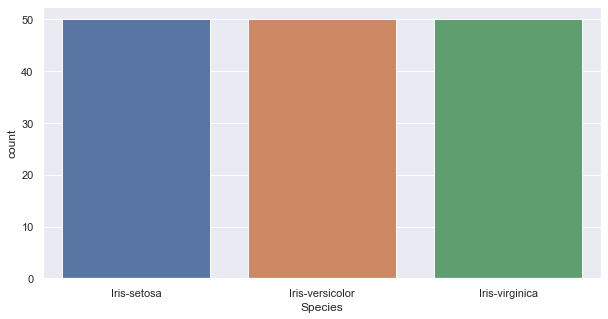

In [8]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,5))
sns.countplot(x="Species", data=dataset)
plt.show()

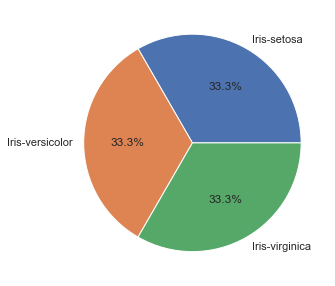

In [9]:
plt.figure(figsize=(10,5))
plt.pie(dataset['Species'].value_counts(),autopct='%1.1f%%', labels=labels)
plt.show()

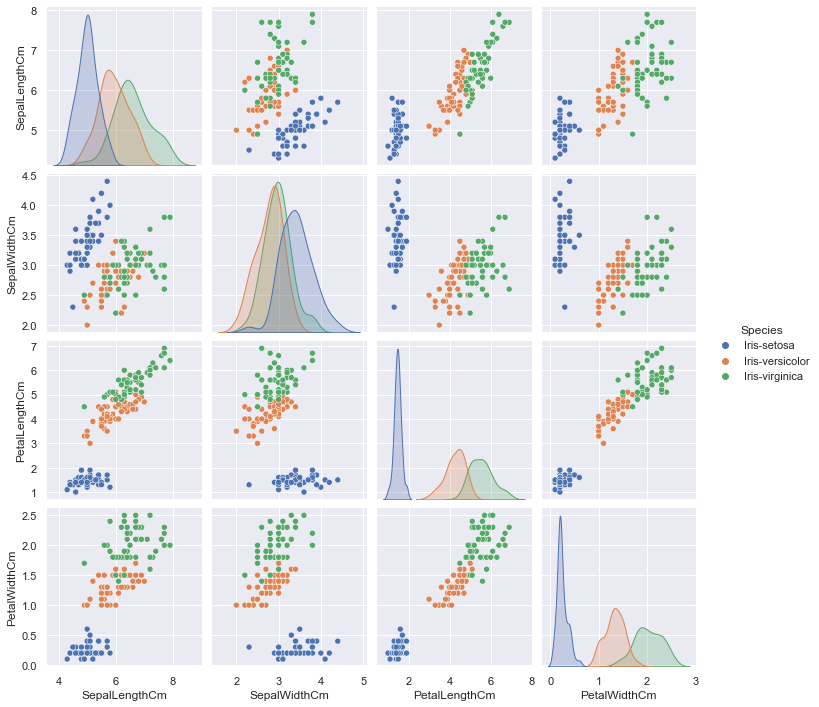

In [10]:
sns.pairplot(dataset.drop('Id', axis=1), hue = 'Species', kind='scatter')

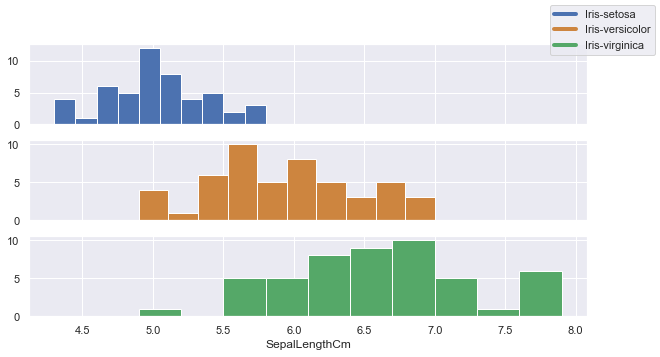

In [11]:
from matplotlib.lines import Line2D

colors = ['b', 'peru', 'g']
custom_lines = [Line2D([0], [0], color=colors[0], lw=4),
                Line2D([0], [0], color=colors[1], lw=4),
                Line2D([0], [0], color=colors[2], lw=4)]

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(10,5))
ax1.hist(dataset['SepalLengthCm'][dataset['Species']==labels[0]], color='b')
ax2.hist(dataset['SepalLengthCm'][dataset['Species']==labels[1]], color='peru')
ax3.hist(dataset['SepalLengthCm'][dataset['Species']==labels[2]], color='g')
plt.xlabel('SepalLengthCm')
plt.ylabel('')
fig.legend(custom_lines, labels, loc='upper right')

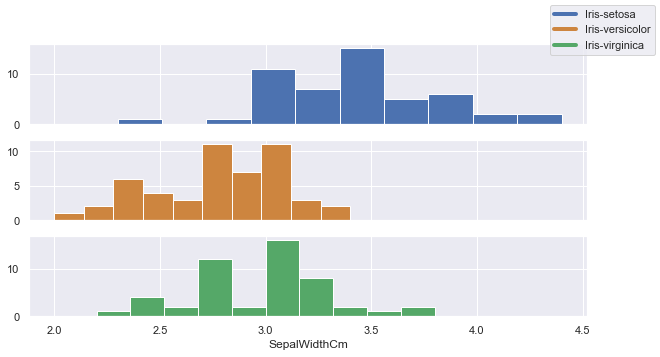

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(10,5))
ax1.hist(dataset['SepalWidthCm'][dataset['Species']==labels[0]], color='b')
ax2.hist(dataset['SepalWidthCm'][dataset['Species']==labels[1]], color='peru')
ax3.hist(dataset['SepalWidthCm'][dataset['Species']==labels[2]], color='g')
plt.xlabel('SepalWidthCm')
plt.ylabel('')
fig.legend(custom_lines, labels, loc='upper right')

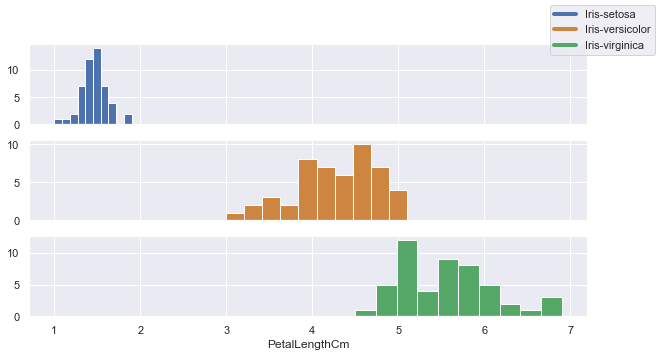

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(10,5))
ax1.hist(dataset['PetalLengthCm'][dataset['Species']==labels[0]], color='b')
ax2.hist(dataset['PetalLengthCm'][dataset['Species']==labels[1]], color='peru')
ax3.hist(dataset['PetalLengthCm'][dataset['Species']==labels[2]], color='g')
plt.xlabel('PetalLengthCm')
plt.ylabel('')
fig.legend(custom_lines, labels, loc='upper right')

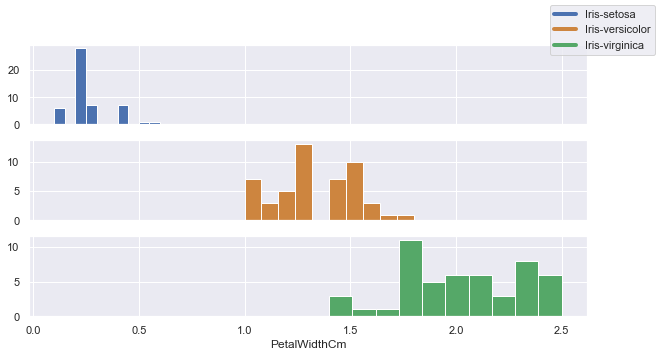

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(10,5))
ax1.hist(dataset['PetalWidthCm'][dataset['Species']==labels[0]], color='b')
ax2.hist(dataset['PetalWidthCm'][dataset['Species']==labels[1]], color='peru')
ax3.hist(dataset['PetalWidthCm'][dataset['Species']==labels[2]], color='g')
plt.xlabel('PetalWidthCm')
plt.ylabel('')
fig.legend(custom_lines, labels, loc='upper right')

# 3. Data Processing

In [15]:
# Dividing dataset into features and encoded labels
X = dataset.drop(['Id', 'Species'], axis=1)
y = dataset['Species'].apply(lambda x: list(labels).index(x))

In [16]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

## Splitting into train set and test set

In [18]:
# Splitting into train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(120, 4) (30, 4)
(120,) (30,)


In [19]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
117,7.7,3.8,6.7,2.2
34,4.9,3.1,1.5,0.1
49,5.0,3.3,1.4,0.2
93,5.0,2.3,3.3,1.0
145,6.7,3.0,5.2,2.3


In [20]:
y_train.head()

117    2
34     0
49     0
93     1
145    2
Name: Species, dtype: int64

# 4. GaussianNB classifier

## Choosing GuassianNB for Iris classifier because we are using continous data.

In [21]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

## Training

In [22]:
# fit training data
clf.fit(X_train,y_train)
clf

GaussianNB()

## Prediction

In [23]:
# predict using test set
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 0, 2, 0, 1, 1, 2, 2, 2, 2, 0, 2, 1,
       2, 0, 1, 1, 1, 2, 0, 0], dtype=int64)

In [24]:
# compute predicted probabilities
y_pred_prob = clf.predict_proba(X_test)
pred_df = pd.DataFrame(np.array(y_pred_prob), columns=labels)
pred_df['Predicted class'] = y_pred
pred_df

,Iris-setosa,Iris-versicolor,Iris-virginica,Predicted class
0,1.000000e+00,1.983776e-17,9.417693e-24,0
1,1.000000e+00,1.674780e-22,1.332803e-26,0
2,1.071536e-62,9.999772e-01,2.281460e-05,1
3,8.526262e-126,4.139320e-02,9.586068e-01,2
4,2.458863e-98,9.835011e-01,1.649893e-02,1
5,2.584105e-144,6.361991e-03,9.936380e-01,2
6,1.924123e-213,1.987148e-08,1.000000e+00,2
7,2.394177e-181,2.123126e-08,1.000000e+00,2
8,5.591108e-227,1.471473e-12,1.000000e+00,2
9,5.239610e-161,6.927119e-04,9.993073e-01,2


## Evaluating

In [25]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score

# confusion matrix
print('confusion matrix:\n', confusion_matrix(y_test, y_pred))

# recall
print('recall: ', recall_score(y_test, y_pred, average=None))

# precision
print('precision: ', precision_score(y_test, y_pred, average=None))

# accuracy
print('accuracy: ', accuracy_score(y_test, y_pred))

confusion matrix:
 [[ 8  0  0]
 [ 0  8  3]
 [ 0  0 11]]
recall:  [1.         0.72727273 1.        ]
precision:  [1.         1.         0.78571429]
accuracy:  0.9
